In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [2]:
#STEPS:
# 1. Data (Encoding also since the collumn is in object)
# 2. Preprocessing/Data Cleaning
#Cat-Numeric
#Scaling
#Corr-matrix heatmap
#selection of features
# 3. Building Models
#cross-validation
# Applying Different Models
#HPT
# 4. Model Selection
# 5. Best Model
# 6. Submit to Competition


# Loading the Datasets

In [3]:
train = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
movies = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
test = pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")

# PREPROCESSING DATA
# Movies Data Set is very Wierd 

Dropping Duplicate entries from genre as well as movieID

In [4]:
df_movies = movies.drop_duplicates(subset=['movieid', 'director'])

In [5]:
df_movies

movieid  \
0                       han_solo_heroic_myth_wonder_woman   
1                   voyage_tyler_durden_han_solo_stardust   
2       norman_bates_ferris_bueller_hermione_granger_v...   
3                                elegant_hermione_granger   
4                                  adventure_rocky_balboa   
...                                                   ...   
143253                 sherlock_holmes_surreal_james_bond   
143254                mr._miyagi_katniss_everdeen_harmony   
143255               elegant_emerald_valiant_donnie_darko   
143256                     wonder_hermione_granger_hulk_v   
143257                                  lara_croft_voyage   

                                                    title  audienceScore  \
0                       Han Solo Heroic Myth Wonder Woman           50.0   
1                   Voyage Tyler Durden Han Solo Stardust            NaN   
2       Norman Bates Ferris Bueller Hermione Granger V...           43.0   
3                                Elegant Hermione Granger           60.0   
4                                  Adventure Rocky Balboa           70.0   
...                                                   ...            ...   
143253                 Sherlock Holmes Surreal James Bond           14.0   
143254                Mr. Miyagi Katniss Everdeen Harmony            NaN   
143255               Elegant Emerald Valiant Donnie Darko           71.0   
143256                     Wonder Hermione Granger Hulk V            NaN   
143257                                  Lara Croft Voyage            NaN   

       rating ratingContents releaseDateTheaters releaseDateStreaming  \
0         NaN            NaN                 NaN           2018-08-25   
1         NaN            NaN                 NaN           2020-02-11   
2         NaN            NaN                 NaN                  NaN   
3         NaN            NaN                 NaN           2020-10-23   
4         NaN            NaN                 NaN           2017-03-27   
...       ...            ...                 ...                  ...   
143253    NaN            NaN          2002-08-27                  NaN   
143254    NaN            NaN                 NaN                  NaN   
143255    NaN            NaN                 NaN                  NaN   
143256    NaN            NaN                 NaN           2006-11-21   
143257    NaN            NaN                 NaN                  NaN   

        runtimeMinutes                          genre originalLanguage  \
0                 75.0         Comedy, Horror, Sci-fi          English   
1                114.0                          Drama          English   
2                120.0                          Drama           Korean   
3                 90.0     Action, Mystery & thriller          English   
4                 80.0  Fantasy, Adventure, Animation          English   
...                ...                            ...              ...   
143253            90.0       Action, Adventure, Anime         Japanese   
143254            99.0                          Drama          English   
143255            43.0                    Documentary          English   
143256            63.0                          Drama          English   
143257            90.0                         Horror          English   

              director boxOffice distributor soundType  
0       Claude Nicolet       NaN         NaN       NaN  
1         Nathan Haack       NaN         NaN       NaN  
2        Theresa Smith       NaN         NaN       NaN  
3         Donald Lewis       NaN         NaN       NaN  
4         Howard Simms       NaN         NaN       NaN  
...                ...       ...         ...       ...  
143253    William Sims       NaN   ADV Films       NaN  
143254  Robert Paddock       NaN         NaN       NaN  
143255    Roy Lovelace       NaN         NaN       NaN  
143256  Dwayne Clayton       NaN         NaN       NaN  
143257  Val

# Columns we can consider based on percentage of null values present: 
MOVIES: movieID, runtimeMinutes, genre, originalLanguage, director, ....
REMOVING OTHERS

In [6]:
df_movies = df_movies.drop(['title', 'audienceScore', 'rating', 'ratingContents','releaseDateTheaters', 'releaseDateStreaming', 'boxOffice','distributor', 'soundType'], axis=1)

In [7]:
df_movies = df_movies.drop_duplicates(subset=['movieid'])

# MERGING THE TRAIN SET TO MOVIES SET

In [8]:
train_data = pd.merge(df_movies,train, on='movieid')
test_data = pd.merge(df_movies, test, on='movieid')

renaming the test data collumn to match with test data

In [9]:
test_data.rename(columns = {'isTopCritic':'isFrequentReviewer'}, inplace = True)

In [10]:
train_data.head()

movieid  runtimeMinutes                      genre  \
0  james_bond_courageous           120.0  Adventure, Drama, Romance   
1  james_bond_courageous           120.0  Adventure, Drama, Romance   
2  james_bond_courageous           120.0  Adventure, Drama, Romance   
3  james_bond_courageous           120.0  Adventure, Drama, Romance   
4  james_bond_courageous           120.0  Adventure, Drama, Romance   

  originalLanguage         director    reviewerName  isFrequentReviewer  \
0          English  Leroy Fernandes  Karen Hamilton               False   
1          English  Leroy Fernandes    Jessica Best               False   
2          English  Leroy Fernandes   Rebekah Gomez               False   
3          English  Leroy Fernandes   Paul Sullivan               False   
4          English  Leroy Fernandes   Stacey Malone                True   

                                          reviewText sentiment  
0  This is nowhere near the level of other great ...  POSITIVE  
1  If you're feeling adventurous and looking for ...  POSITIVE  
2  Mercifully, Vincent Cassel provides a strong l...  POSITIVE  
3  Like the storm that destroys the best laid pla...  POSITIVE  
4  Less a proper coming-of-age movie than a posh ...  NEGATIVE

In [11]:
test_data.head()

movieid  runtimeMinutes  \
0                   james_bond_courageous           120.0   
1                   james_bond_courageous           120.0   
2  jack_torrance_the_joker_luke_skywalker            98.0   
3                    ellis_redding_silent            90.0   
4                    ellis_redding_silent            90.0   

                       genre originalLanguage         director  \
0  Adventure, Drama, Romance          English  Leroy Fernandes   
1  Adventure, Drama, Romance          English  Leroy Fernandes   
2                      Drama          English       Lewis Horn   
3                Documentary          English      Lee Dykstra   
4                Documentary          English      Lee Dykstra   

        reviewerName  isFrequentReviewer  \
0     Elijah Mercado               False   
1     Andrew Holland               False   
2       Dale Montoya               False   
3  Karina Dalton DVM                True   
4     Kenneth Parker                True   

                                          reviewText  
0  In the efficient opening scene of Adrift's tru...  
1                ADRIFT ended up just feeling small.  
2  Highly uneven and inconsistent ... Margarita H...  
3                                                NaN  
4  It feels warmed over, devoid of urgency and, i...

checking for null values

In [12]:
train_data.isnull().sum()

movieid                  0
runtimeMinutes        3376
genre                 2438
originalLanguage      3290
director                 0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [13]:
test_data.isnull().sum()

movieid                  0
runtimeMinutes        1262
genre                  920
originalLanguage      1238
director                 0
reviewerName             0
isFrequentReviewer       0
reviewText            2510
dtype: int64

# IMPUTING and removing VALUES for NULL entries
# runtimeMinutes => mean
# genre, originalLanguage => drop
# reviewText => contant => ''

In [14]:
train_data.dropna(subset = ['genre', 'originalLanguage'], inplace=True)

In [15]:
test_data.dropna(subset = ['genre', 'originalLanguage'], inplace=True)

In [16]:
from sklearn.impute import SimpleImputer

imputer2 = SimpleImputer(strategy='mean')
train_data.runtimeMinutes = imputer2.fit_transform(train_data['runtimeMinutes'].values.reshape(-1,1))[:,0]

train_data['reviewText'] = train_data['reviewText'].fillna('')

In [17]:
from sklearn.impute import SimpleImputer

imputer2 = SimpleImputer(strategy='mean')
test_data.runtimeMinutes = imputer2.fit_transform(test_data['runtimeMinutes'].values.reshape(-1,1))[:,0]

test_data['reviewText'] = test_data['reviewText'].fillna('')

In [18]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

movieid               0
runtimeMinutes        0
genre                 0
originalLanguage      0
director              0
reviewerName          0
isFrequentReviewer    0
reviewText            0
sentiment             0
dtype: int64
movieid               0
runtimeMinutes        0
genre                 0
originalLanguage      0
director              0
reviewerName          0
isFrequentReviewer    0
reviewText            0
dtype: int64


# Converting CATEGORICAL DATA TO NUMERICAL:
# 1. LabelEncoder: 
#         movieid, originalLanguage, director, isFrequentReviewer, reviewerName, sentiment
# 2. MultiLabelBinarizer: genre
# 3. CountVectorizer: reviewText

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data.movieid = label_encoder.fit_transform(train_data['movieid'])
train_data.originalLanguage = label_encoder.fit_transform(train_data['originalLanguage'])
train_data.director = label_encoder.fit_transform(train_data['director'])
train_data.sentiment= label_encoder.fit_transform(train_data['sentiment'])
train_data.isFrequentReviewer = label_encoder.fit_transform(train_data['isFrequentReviewer'])
train_data.reviewerName = label_encoder.fit_transform(train_data['reviewerName'])

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

test_data.movieid = label_encoder.fit_transform(test_data['movieid'])
test_data.originalLanguage = label_encoder.fit_transform(test_data['originalLanguage'])
test_data.director = label_encoder.fit_transform(test_data['director'])
test_data.isFrequentReviewer = label_encoder.fit_transform(test_data['isFrequentReviewer'])
test_data.reviewerName = label_encoder.fit_transform(test_data['reviewerName'])

In [21]:
train_data.movieid = train_data['movieid'].astype(float)
train_data.originalLanguage = train_data['originalLanguage'].astype(float)
train_data.reviewerName = train_data['reviewerName'].astype(float)
train_data.isFrequentReviewer = train_data['isFrequentReviewer'].astype(float)
train_data.director = train_data['director'].astype(float)
train_data.sentiment = train_data['sentiment'].astype(float)
# X_test.runtimeMinutes = X_test['runtimeMinutes'].astype(int)

In [22]:
test_data.movieid = test_data['movieid'].astype(float)
test_data.originalLanguage = test_data['originalLanguage'].astype(float)
test_data.reviewerName = test_data['reviewerName'].astype(float)
test_data.isFrequentReviewer = test_data['isFrequentReviewer'].astype(float)
test_data.director = test_data['director'].astype(float)

In [23]:
train_data.head()

movieid  runtimeMinutes                      genre  originalLanguage  \
0   7626.0           120.0  Adventure, Drama, Romance              18.0   
1   7626.0           120.0  Adventure, Drama, Romance              18.0   
2   7626.0           120.0  Adventure, Drama, Romance              18.0   
3   7626.0           120.0  Adventure, Drama, Romance              18.0   
4   7626.0           120.0  Adventure, Drama, Romance              18.0   

   director  reviewerName  isFrequentReviewer  \
0    5330.0        2289.0                 0.0   
1    5330.0        1977.0                 0.0   
2    5330.0        3510.0                 0.0   
3    5330.0        3399.0                 0.0   
4    5330.0        3920.0                 1.0   

                                          reviewText  sentiment  
0  This is nowhere near the level of other great ...        1.0  
1  If you're feeling adventurous and looking for ...        1.0  
2  Mercifully, Vincent Cassel provides a strong l...        1.0  
3  Like the storm that destroys the best laid pla...        1.0  
4  Less a proper coming-of-age movie than a posh ...        0.0

# PERFORMING EDA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159445 entries, 0 to 162757
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movieid             159445 non-null  float64
 1   runtimeMinutes      159445 non-null  float64
 2   genre               159445 non-null  object 
 3   originalLanguage    159445 non-null  float64
 4   director            159445 non-null  float64
 5   reviewerName        159445 non-null  float64
 6   isFrequentReviewer  159445 non-null  float64
 7   reviewText          159445 non-null  object 
 8   sentiment           159445 non-null  float64
dtypes: float64(7), object(2)
memory usage: 12.2+ MB


In [26]:
display(train_data.describe().round(2))

movieid  runtimeMinutes  originalLanguage   director  reviewerName  \
count  159445.00       159445.00         159445.00  159445.00     159445.00   
mean     8158.86          106.98             21.24    4685.77       2292.19   
std      4693.84           21.63             11.36    2675.82       1273.60   
min         0.00            5.00              0.00       0.00          0.00   
25%      4154.00           93.00             18.00    2415.00       1179.00   
50%      8085.00          104.00             18.00    4685.00       2317.00   
75%     12183.00          118.00             18.00    7006.00       3374.00   
max     16357.00          561.00             90.00    9232.00       4452.00   

       isFrequentReviewer  sentiment  
count           159445.00  159445.00  
mean                 0.30       0.67  
std                  0.46       0.47  
min                  0.00       0.00  
25%                  0.00       0.00  
50%                  0.00       1.00  
75%                  1.00       1.00  
max                  1.00       1.00

In [27]:
print("Skewness: %f" %train_data['movieid'].skew())
print("Kurtosis: %f" %train_data['movieid'].kurt())

Skewness: 0.017589
Kurtosis: -1.178585


<Axes: xlabel='runtimeMinutes'>

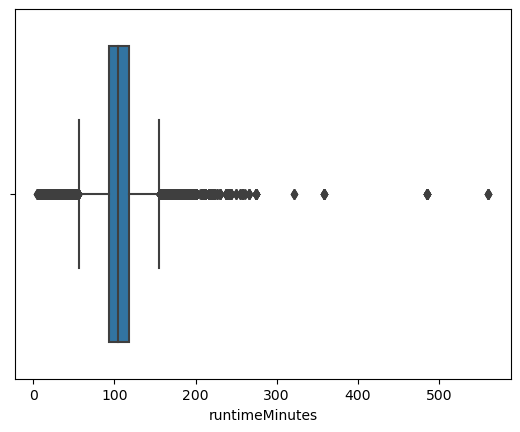

In [28]:
sns.boxplot(x=train_data["runtimeMinutes"])


In [29]:
test_data.describe()

movieid  runtimeMinutes  originalLanguage      director  \
count  54071.000000    54071.000000      54071.000000  54071.000000   
mean    8127.618150      106.224038         20.436778   4688.612713   
std     4689.789341       21.565293         11.581066   2665.619166   
min        0.000000        5.000000          0.000000      0.000000   
25%     4093.000000       93.000000         17.000000   2428.000000   
50%     8072.000000      103.000000         17.000000   4683.000000   
75%    12140.500000      117.000000         17.000000   6984.000000   
max    16337.000000      561.000000         89.000000   9234.000000   

       reviewerName  isFrequentReviewer  
count  54071.000000        54071.000000  
mean    2297.989403            0.304858  
std     1269.458590            0.460352  
min        0.000000            0.000000  
25%     1187.000000            0.000000  
50%     2326.000000            0.000000  
75%     3384.000000            1.000000  
max     4445.000000            1.000000

# CREATING 2 DATAFRAMES
# 1. X2 => EXCLUDING REVIEWTEXT and sentiment
# 2. X1 => Sparse matrix for reviewText

# Label => sentiment

In [30]:
label = train_data['sentiment']
X1=train_data['reviewText']
X2 = train_data.drop(columns = ['sentiment', 'reviewText', 'genre'])

ENCODING GENRE COLUMN USING MULTILABELBINARIZER AND COMBINING THE SPARSE MATRIX RECIEVED BACK TO COMBINED DATAFRAME

In [31]:
list_genre=[]
list_genre2=[]
genre = list(train_data['genre'])
genre2 = list(test_data['genre'])

for i in genre:
    list_genre.append(i.split(', '))
for i in genre2:
    list_genre2.append(i.split(', '))    

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
encoded_genre = mlb.fit_transform(list_genre)
encoded_genre2 = mlb.transform(list_genre2)


In [33]:
encoded_genre

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
genre_df = pd.DataFrame(data = encoded_genre[0:, 0:],
                        index = [(i) 
                        for i in range(encoded_genre.shape[0])],
                        columns = [i 
                        for i in mlb.classes_])

In [35]:
genre_df2 = pd.DataFrame(data = encoded_genre2[0:, 0:],
                        index = [(i) 
                        for i in range(encoded_genre2.shape[0])],
                        columns = [i 
                        for i in mlb.classes_])

In [36]:
X2.reset_index(inplace = True)

In [37]:
X2 = X2.drop('index', axis=1)

In [38]:
genre_df

Action  Adventure  Animation  Anime  Biography  Comedy  Crime  \
0            0          1          0      0          0       0      0   
1            0          1          0      0          0       0      0   
2            0          1          0      0          0       0      0   
3            0          1          0      0          0       0      0   
4            0          1          0      0          0       0      0   
...        ...        ...        ...    ...        ...     ...    ...   
159440       0          0          0      0          0       1      0   
159441       0          0          0      0          0       1      0   
159442       0          0          0      0          0       1      0   
159443       0          0          0      0          0       1      0   
159444       0          0          0      0          0       1      0   

        Documentary  Drama  Faith & spirituality  ...  Other  Romance  Sci-fi  \
0                 0      1                     0  ...      0        1       0   
1                 0      1                     0  ...      0        1       0   
2                 0      1                     0  ...      0        1       0   
3                 0      1                     0  ...      0        1       0   
4                 0      1                     0  ...      0        1       0   
...             ...    ...                   ...  ...    ...      ...     ...   
159440            0      0                     0  ...      0        0       0   
159441            0      0                     0  ...      0        0       0   
159442            0      0                     0  ...      0        0       0   
159443            0      0                     0  ...      0        0       0   
159444            0      0                     0  ...      0        0       0   

        Short  Sports  Sports & fitness  Stand-up  Variety  War  Western  
0           0       0                 0         0        0    0        0  
1           0       0                 0         0        0    0        0  
2           0       0                 0         0        0    0        0  
3           0       0                 0         0        0    0        0  
4           0       0                 0         0        0    0        0  
...       ...     ...               ...       ...      ...  ...      ...  
159440      0       0                 0         0        0    0        0  
159441      0       0                 0         0        0    0        0  
159442      0       0                 0         0        0    0        0  
159443      0       0                 0         0        0    0        0  
159444      0       0                 0         0        0    0        0  

[159445 rows x 34 columns]

In [39]:
merged_df = pd.merge(X2, genre_df, left_index=True, right_index=True)

In [40]:
merged_df.head()

movieid  runtimeMinutes  originalLanguage  director  reviewerName  \
0   7626.0           120.0              18.0    5330.0        2289.0   
1   7626.0           120.0              18.0    5330.0        1977.0   
2   7626.0           120.0              18.0    5330.0        3510.0   
3   7626.0           120.0              18.0    5330.0        3399.0   
4   7626.0           120.0              18.0    5330.0        3920.0   

   isFrequentReviewer  Action  Adventure  Animation  Anime  ...  Other  \
0                 0.0       0          1          0      0  ...      0   
1                 0.0       0          1          0      0  ...      0   
2                 0.0       0          1          0      0  ...      0   
3                 0.0       0          1          0      0  ...      0   
4                 1.0       0          1          0      0  ...      0   

   Romance  Sci-fi  Short  Sports  Sports & fitness  Stand-up  Variety  War  \
0        1       0      0       0                 0         0        0    0   
1        1       0      0       0                 0         0        0    0   
2        1       0      0       0                 0         0        0    0   
3        1       0      0       0                 0         0        0    0   
4        1       0      0       0                 0         0        0    0   

   Western  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 40 columns]

# HANDELING IMBALANCED DATASET

In [145]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(merged_df, label)

# Univariate Analysis

In [146]:
X.describe()

movieid  runtimeMinutes  originalLanguage       director  \
count  212878.000000   212878.000000     212878.000000  212878.000000   
mean     8152.653317      106.610723         20.932725    4684.700960   
std      4701.338393       20.660352         10.570510    2673.365024   
min         0.000000        5.000000          0.000000       0.000000   
25%      4111.000000       94.000000         18.000000    2415.000000   
50%      8109.000000      104.000000         18.000000    4686.283631   
75%     12180.584222      117.000000         18.000000    6999.000000   
max     16357.000000      561.000000         90.000000    9232.000000   

        reviewerName  isFrequentReviewer         Action      Adventure  \
count  212878.000000       212878.000000  212878.000000  212878.000000   
mean     2302.842925            0.312553       0.134631       0.116447   
std      1272.992396            0.443477       0.341330       0.320761   
min         0.000000            0.000000       0.000000       0.000000   
25%      1196.000000            0.000000       0.000000       0.000000   
50%      2336.000000            0.000000       0.000000       0.000000   
75%      3386.000000            1.000000       0.000000       0.000000   
max      4452.000000            1.000000       1.000000       1.000000   

           Animation          Anime  ...          Other        Romance  \
count  212878.000000  212878.000000  ...  212878.000000  212878.000000   
mean        0.031436       0.003551  ...       0.000009       0.075710   
std         0.174493       0.059487  ...       0.003065       0.264534   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

              Sci-fi          Short         Sports  Sports & fitness  \
count  212878.000000  212878.000000  212878.000000     212878.000000   
mean        0.057935       0.000014       0.000070          0.000108   
std         0.233620       0.003754       0.008394          0.010394   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.000000       0.000000       0.000000          0.000000   
50%         0.000000       0.000000       0.000000          0.000000   
75%         0.000000       0.000000       0.000000          0.000000   
max         1.000000       1.000000       1.000000          1.000000   

            Stand-up        Variety            War        Western  
count  212878.000000  212878.000000  212878.000000  212878.000000  
mean        0.000052       0.000005       0.015201       0.008625  
std         0.007188       0.002167       0.122353       0.092468  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 40 columns]

In [147]:
 X.iloc[:,:6]

movieid  runtimeMinutes  originalLanguage     director  \
0        7626.000000      120.000000         18.000000  5330.000000   
1        7626.000000      120.000000         18.000000  5330.000000   
2        7626.000000      120.000000         18.000000  5330.000000   
3        7626.000000      120.000000         18.000000  5330.000000   
4        7626.000000      120.000000         18.000000  5330.000000   
...              ...             ...               ...          ...   
212873  13831.987830      108.553592         18.000000  2930.183745   
212874  13933.000000       94.000000         18.000000   691.000000   
212875    336.530275      100.472588         18.000000  6914.016047   
212876   1062.484232      103.759459         38.872972  1783.089190   
212877   9394.947038       85.654309         18.000000  3462.202694   

        reviewerName  isFrequentReviewer  
0        2289.000000            0.000000  
1        1977.000000            0.000000  
2        3510.000000            0.000000  
3        3399.000000            0.000000  
4        3920.000000            1.000000  
...              ...                 ...  
212873   2232.170004            0.000000  
212874   3140.439665            0.000000  
212875    295.781662            0.690926  
212876   3104.948647            0.540090  
212877   2610.627828            0.832451  

[212878 rows x 6 columns]

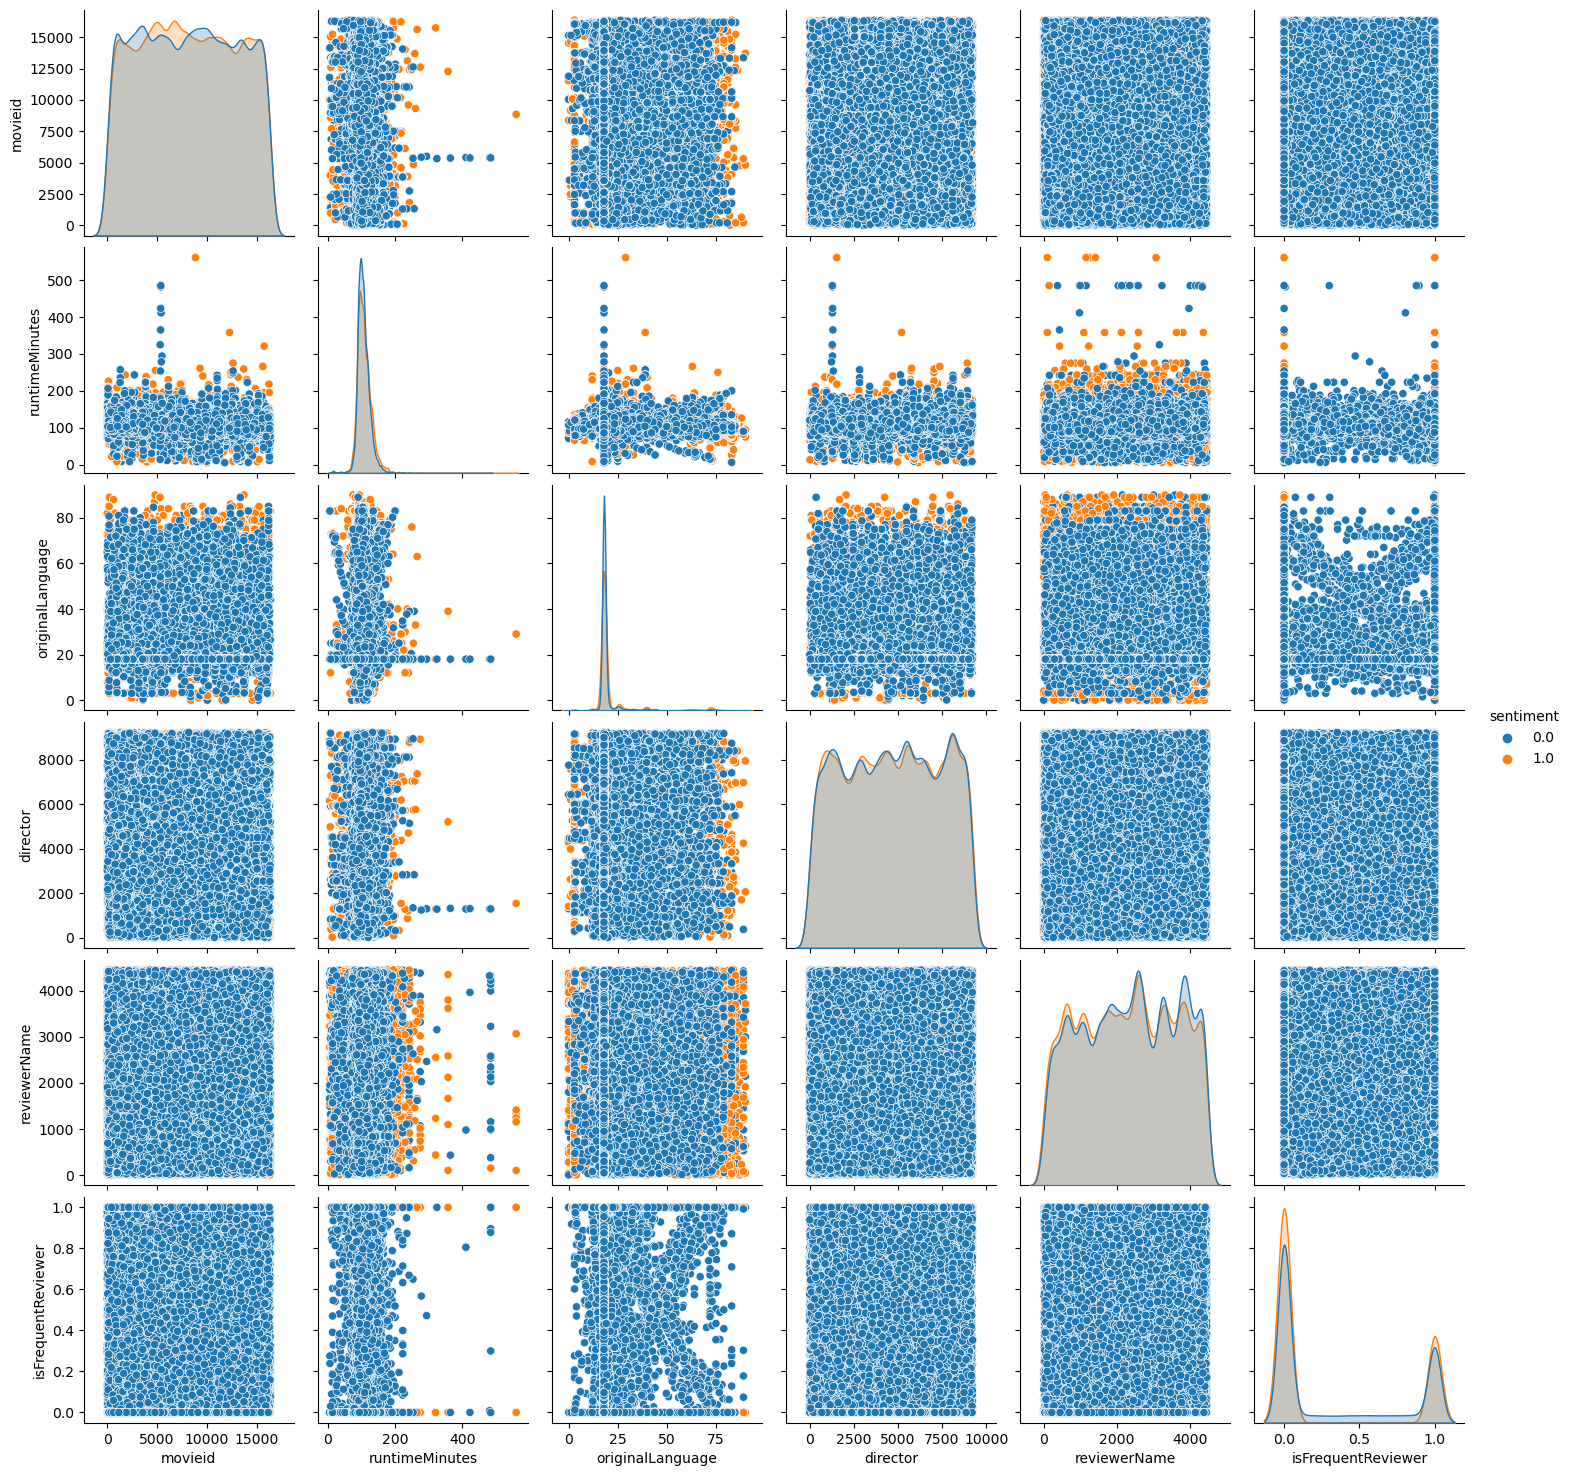

In [148]:
import seaborn as sns
s = X.iloc[:,:6]
s['sentiment'] = y
sns.pairplot(s, hue='sentiment')

In [149]:
X.describe().round()

/tmp/ipykernel_32/1945853370.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X["movieid"], ax = ax[0,1])
/tmp/ipykernel_32/1945853370.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X["runtimeMinutes"], ax = ax[1,1])
/tmp/ipykernel_32/1945853370.py:7: UserWarning: 

`distplot` is a depre

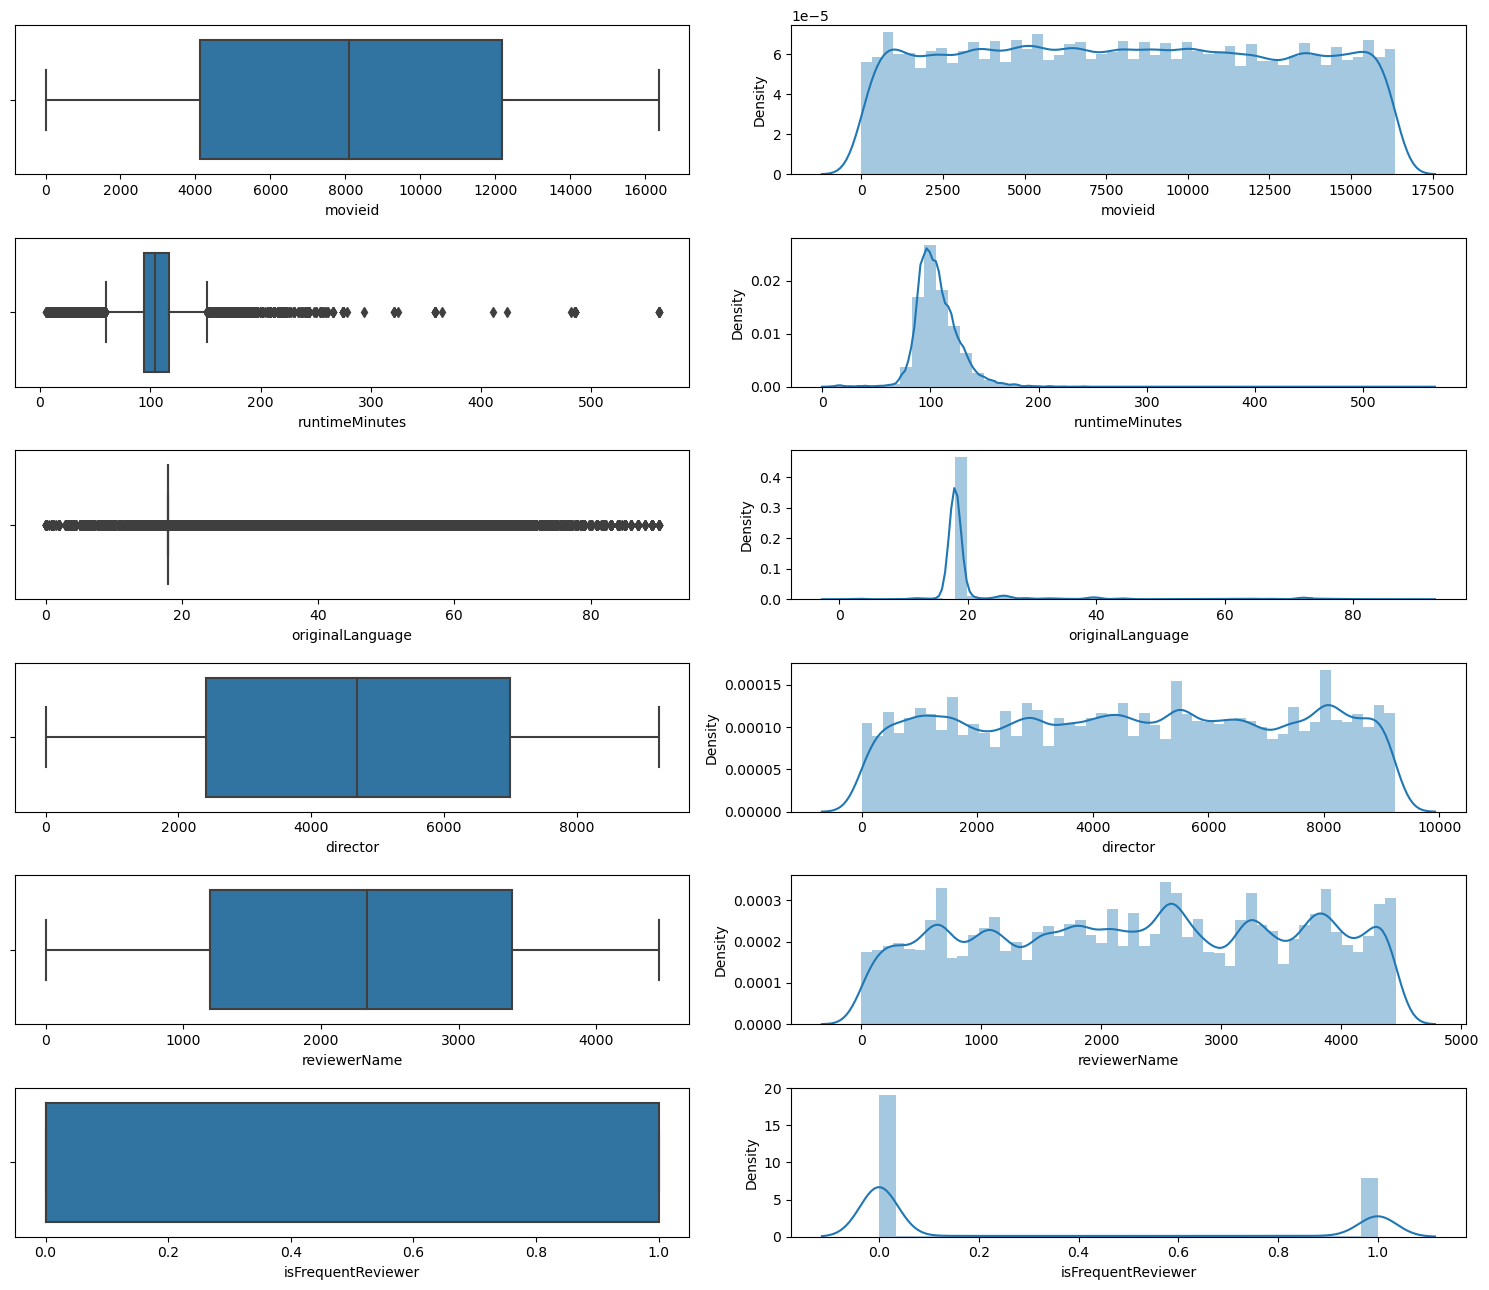

In [159]:
fig, ax = plt.subplots(6, 2, figsize = (15, 13))
sns.boxplot(x= X["movieid"], ax = ax[0,0])
sns.distplot(X["movieid"], ax = ax[0,1])
sns.boxplot(x= X["runtimeMinutes"], ax = ax[1,0])
sns.distplot(X["runtimeMinutes"], ax = ax[1,1])
sns.boxplot(x= X["originalLanguage"], ax = ax[2,0])
sns.distplot(X["originalLanguage"], ax = ax[2,1])
sns.boxplot(x= X["director"], ax = ax[3,0])
sns.distplot(X["director"], ax = ax[3,1])
sns.boxplot(x= X["reviewerName"], ax = ax[4,0])
sns.distplot(X["reviewerName"], ax = ax[4,1])
sns.boxplot(x= X["isFrequentReviewer"], ax = ax[5,0])
sns.distplot(X["isFrequentReviewer"], ax = ax[5,1])
plt.tight_layout()

# MULTIVARIATE ANALYSIS

<Axes: >

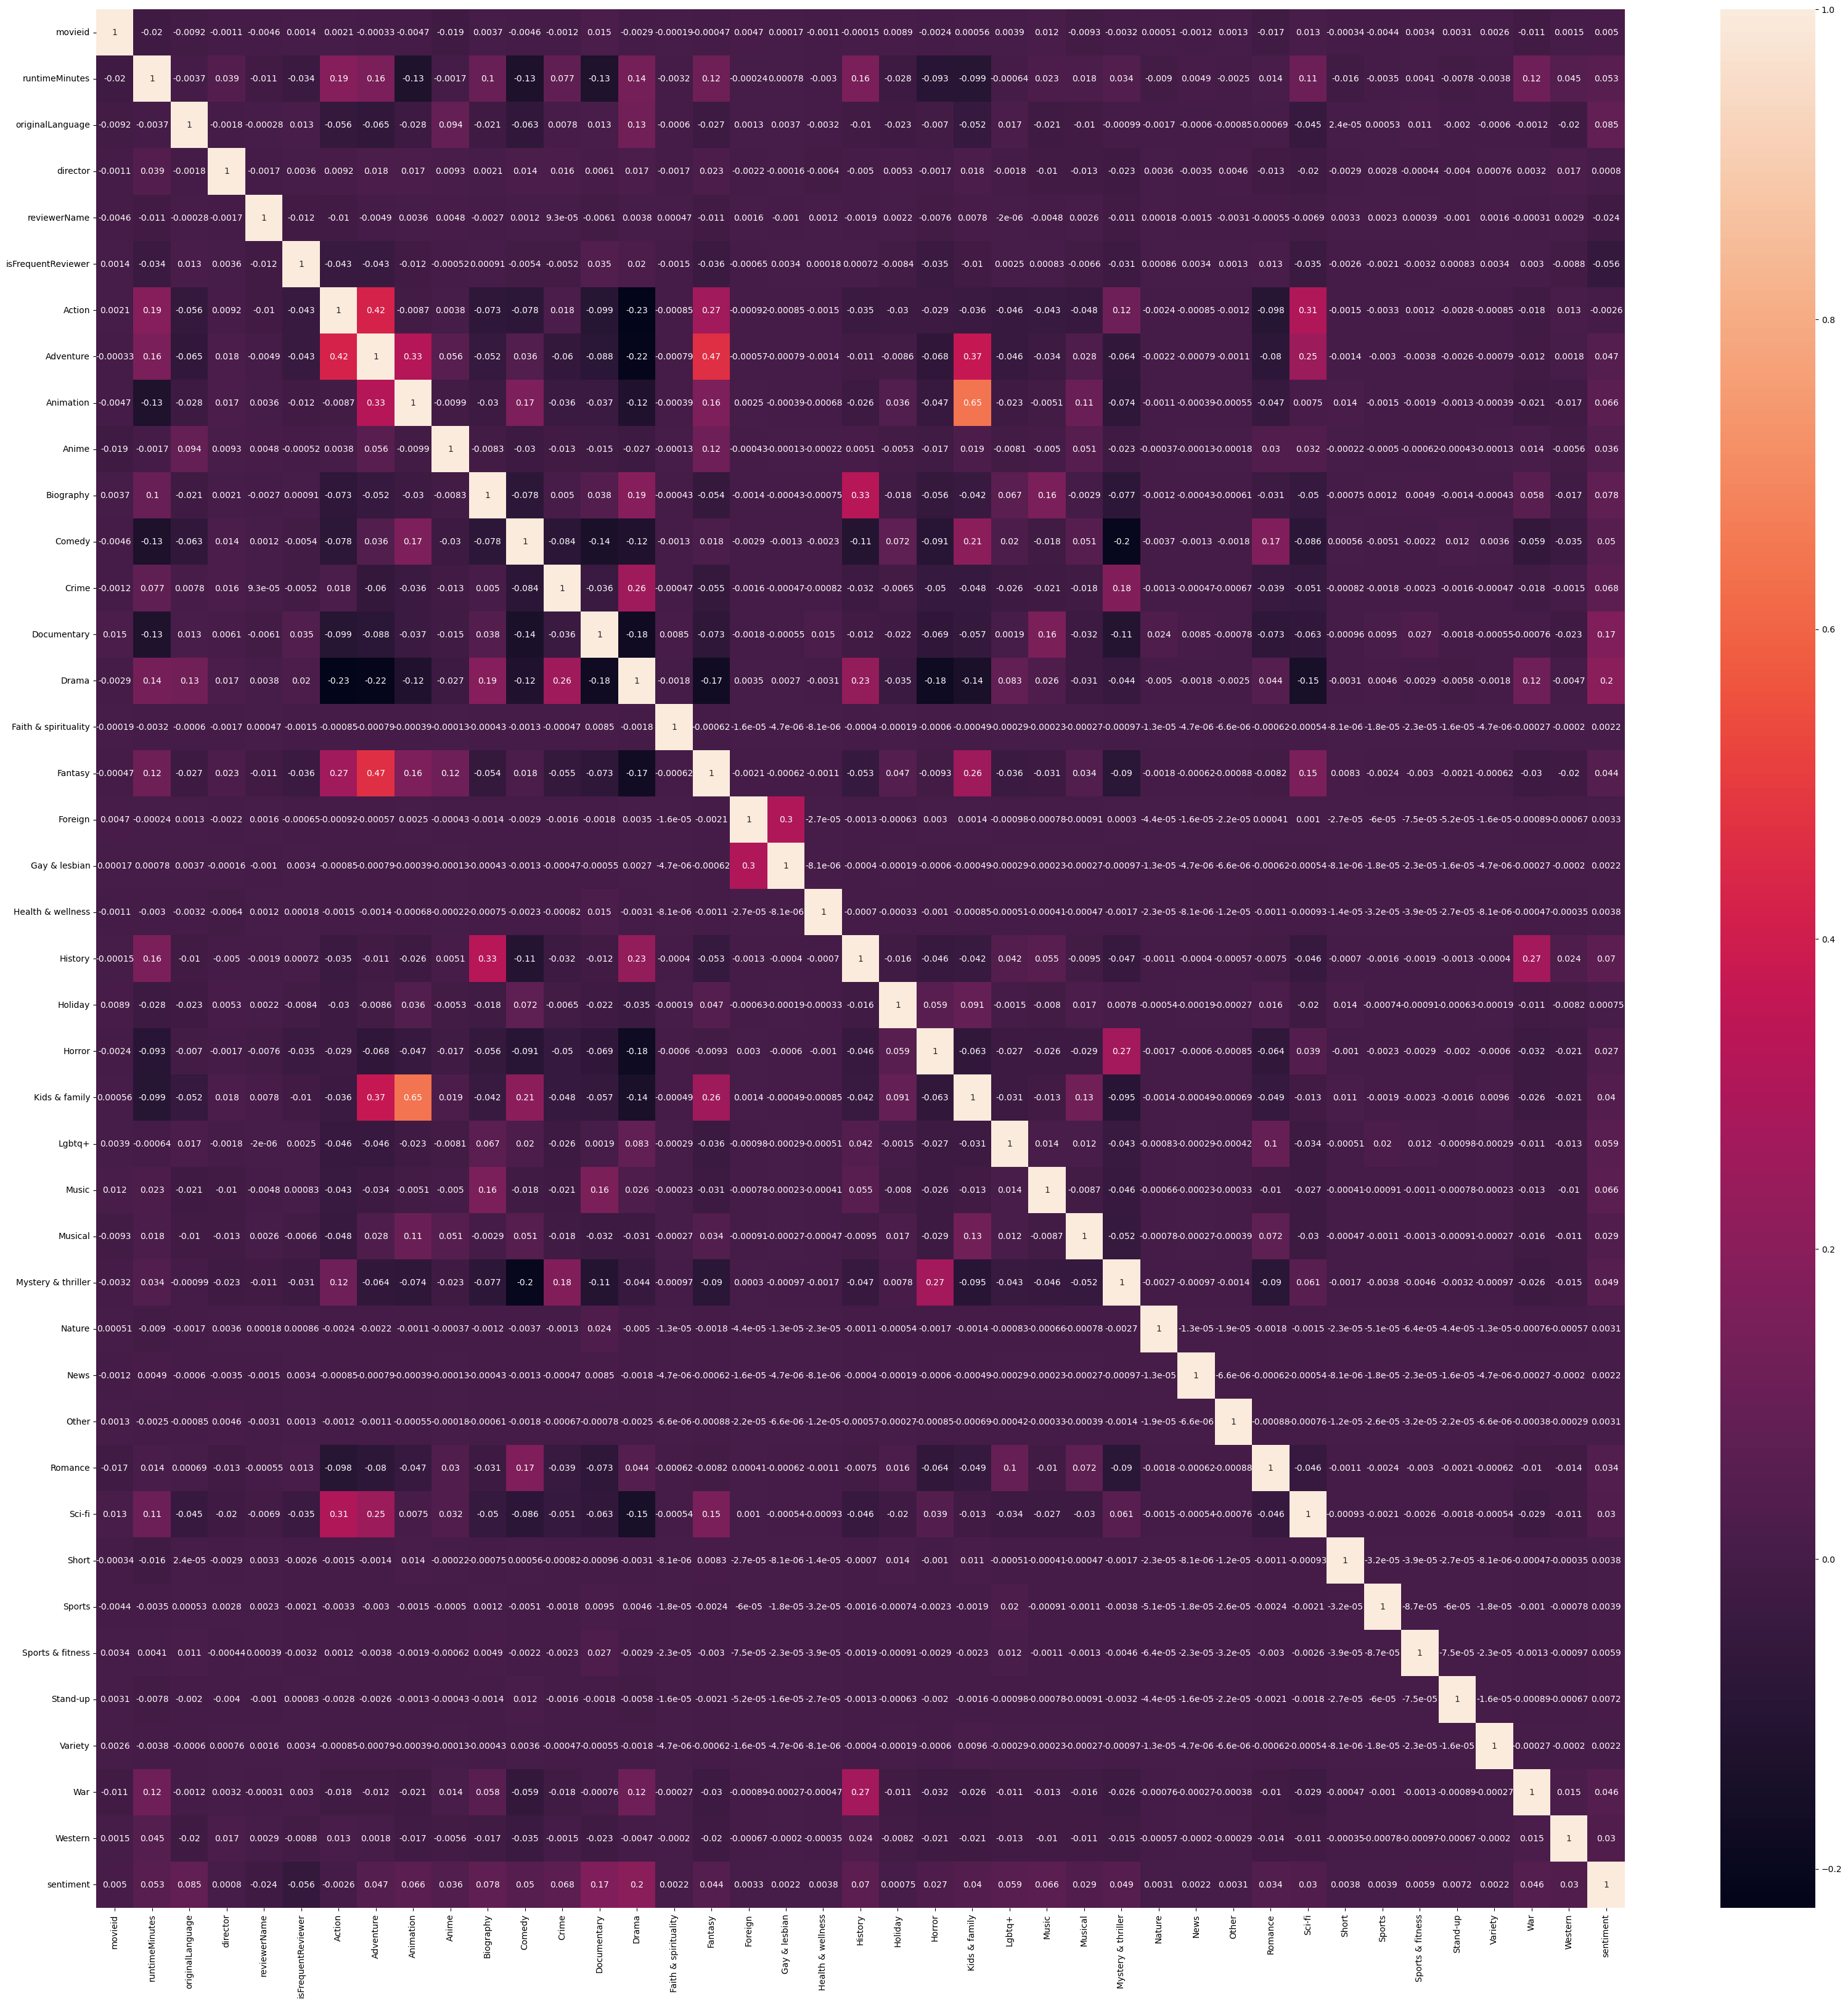

In [160]:
X['sentiment'] = y
corr_matrix = X.corr()
plt.figure(figsize=(40, 40))
sns.heatmap(corr_matrix, annot=True)


In [161]:
X = X.drop('sentiment', axis=1)

# FEATURE SELECTION IN THE COMBINED DATAFRAME

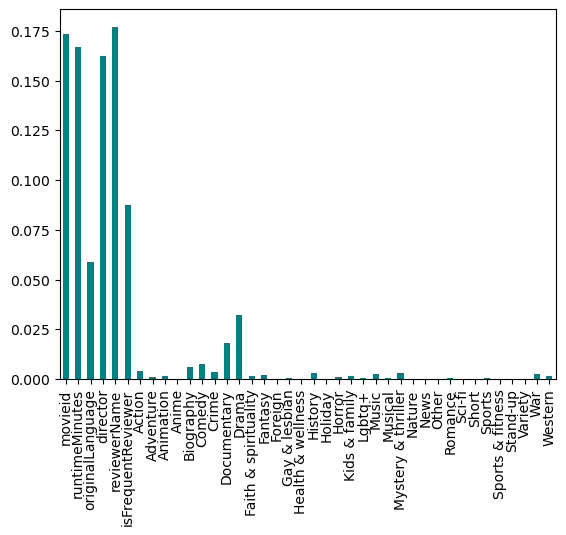

<Figure size 2000x1800 with 0 Axes>

In [162]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X, y)
feat_importances = pd.Series(importances, X.columns)
feat_importances.plot(kind='bar', color='teal')
plt.figure(figsize=(20, 18))
plt.show()

In [163]:
mutual_info = pd.Series(importances)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

reviewerName            0.176923
movieid                 0.173218
runtimeMinutes          0.166787
director                0.162386
isFrequentReviewer      0.087611
originalLanguage        0.058839
Drama                   0.032297
Documentary             0.017962
Comedy                  0.007708
Biography               0.005844
Action                  0.004155
Crime                   0.003677
History                 0.003105
Mystery & thriller      0.003022
War                     0.002669
Music                   0.002619
Fantasy                 0.001866
Western                 0.001453
Kids & family           0.001416
Animation               0.001397
Faith & spirituality    0.001283
Adventure               0.000909
Horror                  0.000877
Sports                  0.000750
Lgbtq+                  0.000595
Gay & lesbian           0.000427
Musical                 0.000341
Romance                 0.000316
Sports & fitness        0.000175
Health & wellness       0.000060
Holiday   

In [164]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2
s = SelectKBest(mutual_info_classif, k=25)
s.fit(X, y)
X.columns[s.get_support()]

Index(['movieid', 'runtimeMinutes', 'originalLanguage', 'director',
       'reviewerName', 'isFrequentReviewer', 'Action', 'Adventure',
       'Animation', 'Anime', 'Biography', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'History', 'Kids & family', 'Lgbtq+', 'Music',
       'Musical', 'Mystery & thriller', 'Sci-fi', 'Short', 'War'],
      dtype='object')

In [165]:
best_df = s.transform(X)

In [166]:
best_df = pd.DataFrame(data = best_df[0:, 0:],
                        index = [(i) 
                        for i in range(best_df.shape[0])],
                        columns = [i 
                        for i in X.columns[s.get_support()]])

In [167]:
best_df.describe()

movieid  runtimeMinutes  originalLanguage       director  \
count  212878.000000   212878.000000     212878.000000  212878.000000   
mean     8152.653317      106.610723         20.932725    4684.700960   
std      4701.338393       20.660352         10.570510    2673.365024   
min         0.000000        5.000000          0.000000       0.000000   
25%      4111.000000       94.000000         18.000000    2415.000000   
50%      8109.000000      104.000000         18.000000    4686.283631   
75%     12180.584222      117.000000         18.000000    6999.000000   
max     16357.000000      561.000000         90.000000    9232.000000   

        reviewerName  isFrequentReviewer         Action      Adventure  \
count  212878.000000       212878.000000  212878.000000  212878.000000   
mean     2302.842925            0.312553       0.134631       0.116447   
std      1272.992396            0.443477       0.341330       0.320761   
min         0.000000            0.000000       0.000000       0.000000   
25%      1196.000000            0.000000       0.000000       0.000000   
50%      2336.000000            0.000000       0.000000       0.000000   
75%      3386.000000            1.000000       0.000000       0.000000   
max      4452.000000            1.000000       1.000000       1.000000   

           Animation          Anime  ...        Fantasy        History  \
count  212878.000000  212878.000000  ...  212878.000000  212878.000000   
mean        0.031436       0.003551  ...       0.076462       0.033559   
std         0.174493       0.059487  ...       0.265736       0.180092   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         0.000000       0.000000  ...       0.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

       Kids & family         Lgbtq+          Music        Musical  \
count  212878.000000  212878.000000  212878.000000  212878.000000   
mean        0.048572       0.018142       0.011556       0.015737   
std         0.214973       0.133465       0.106876       0.124455   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       Mystery & thriller         Sci-fi          Short            War  
count       212878.000000  212878.000000  212878.000000  212878.000000  
mean             0.166438       0.057935       0.000014       0.015201  
std              0.372474       0.233620       0.003754       0.122353  
min              0.000000       0.000000       0.000000       0.000000  
25%              0.000000       0.000000       0.000000       0.000000  
50%              0.000000       0.000000       0.000000       0.000000  
75%              0.000000       0.000000       0.000000       0.000000  
max              1.000000       1.000000       1.000000       1.000000  

[8 rows x 25 columns]

Feature Selection Wrapper Based
PCA


# SPLITTING COMBINED DATAFRAME

In [55]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(best_df, y, test_size=0.2, random_state=42)

# TAKING COMBINED DATAFRAME INTO THE CONSIDERATION

In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [57]:
X2_train = pd.DataFrame(data = X2_train_scaled[0:, 0:],
                        index = [(i) 
                        for i in range(X2_train_scaled.shape[0])],
                        columns = [i 
                        for i in scaler.get_feature_names_out()])

In [58]:
X2_test = pd.DataFrame(data = X2_test_scaled[0:, 0:],
                        index = [(i) 
                        for i in range(X2_test_scaled.shape[0])],
                        columns = [i 
                        for i in scaler.get_feature_names_out()])

In [59]:
X2_train.describe().round(2)

# BUILDING MODEL: LOGISTIC REGRESSION

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Step 3: Define the hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (smaller values indicate stronger regularization)
    'penalty': ['l1', 'l2'],  # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']  # Solver for optimization problem (recommended for small datasets)
}

# Step 4: Create the logistic regression model
logreg = LogisticRegression()

# Step 5: Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X2_train, y2_train)

# Step 6: Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Step 7: Make predictions on the test set using the best model
y_pred = best_model.predict(X2_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y2_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
percept = Perceptron(max_iter=100, random_state=1729)

In [62]:
percept.fit(X2_train, y2_train)

In [63]:
print('Dimention of Weights w: {0}'.format(percept.coef_.shape))
print('Bias :{0}'.format(percept.intercept_))
print('The loss function: {0}'.format(percept.loss_function_))

In [64]:
print('Training Accuracy: ',percept.score(X2_train,y2_train))

In [65]:
print('Training Accuracy: ',percept.score(X2_test,y2_test))

In [66]:
y_pred = percept.predict(X2_train)

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_predictions(y2_train,y_pred,values_format='.5g')
plt.show()

In [68]:
y_pred



# NEEDS BETTER FEATURE SELECTION

# Taking ReviewText data into consideration

# TRAINING USING JUST THE **reviewText** COLLUMN

In [69]:

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# model selection utilities for training and test split and cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# use shuffle-split cross validation for this exercise.
from sklearn.model_selection import ShuffleSplit

# make use of confusion matrix and classification report to evaluate performance
# on the test set.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# the model is defined through pipeline utility.
from sklearn.pipeline import Pipeline

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(stop_words = 'english',)
X1_vect = vectorizer.fit_transform(X1)
X1_test_vect = vectorizer.transform(test_data.reviewText)

#combining all data

In [71]:
label.value_counts()

1.0    106439
0.0     53006
Name: sentiment, dtype: int64

# HANDELING DATA IMBALANCE

In [72]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X1_vect, label)

In [73]:
X.shape

(212878, 64288)

In [74]:
y.value_counts()

1.0    106439
0.0    106439
Name: sentiment, dtype: int64

# Splitting into train test for model testing

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# FUNCTIONS FOR MODEL COMPARISON:
#     1. MODEL TRAINING, AND RETURNING F1 SCORE
#     2. EVALUATION
def train_classifiers(estimator, X_train, y_train, cv, name):
    
    estimator.fit(X_train, y_train)
    cv_train_score = cross_val_score(estimator, X_train, y_train,
                                   cv=cv, scoring='f1_macro')
    print(f"On an average, {name} model has f1 score of "f"{cv_train_score.mean():.3f} +/- {cv_train_score.std():.3f} on the training set.")
    try:
        
        print('Dimention of Weights w: {0}'.format(estimator.coef_.shape))
        print('Bias :{0}'.format(estimator.intercept_))
        print('The loss function: {0}'.format(estimator.loss_function_))
    except:
        pass
    print('Training Accuracy: ',estimator.score(X_train,y_train))
    print('Testing Accuracy: ',estimator.score(X_test,y_test))

def eval(estimator, X_test, y_test):
  y_pred = estimator.predict(X_test)

  print("# Classification report")
  print(classification_report(y_test, y_pred))

  print("# Confusion matrix")
  disp = ConfusionMatrixDisplay(
      confusion_matrix=confusion_matrix(y_test, y_pred))
  disp.plot()
  plt.title('Confusion matrix')
  plt.show()

# BUILDING MODELS

# LOGISTIC REGRESSION

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Step 3: Define the hyperparameters and their possible values for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (smaller values indicate stronger regularization)
    'penalty': ['l1', 'l2'],  # Regularization type ('l1' for Lasso, 'l2' for Ridge)
    'solver': ['liblinear']  # Solver for optimization problem (recommended for small datasets)
}

# Step 4: Create the logistic regression model
logreg = LogisticRegression()

# Step 5: Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=2)
grid_search.fit(X_train, y_train)

# Step 6: Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model_log_reg = grid_search.best_estimator_

# Step 7: Make predictions on the test set using the best model
y_pred = best_model_log_reg.predict(X_test)

# Step 8: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)


Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8267803457346862


On an average, LOGISTIC REGRESSION model has f1 score of 0.818 +/- 0.002 on the training set.
Dimention of Weights w: (1, 64288)
Bias :[-1.71761509]
Training Accuracy:  0.8979342579652617
Testing Accuracy:  0.8267803457346862
# Classification report
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83     21526
         1.0       0.85      0.79      0.82     21050

    accuracy                           0.83     42576
   macro avg       0.83      0.83      0.83     42576
weighted avg       0.83      0.83      0.83     42576

# Confusion matrix


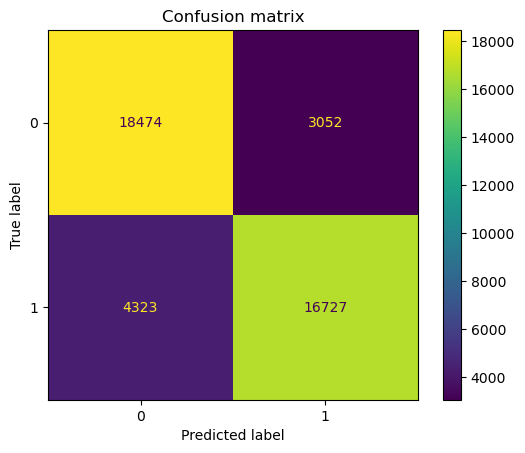

In [124]:
log_reg = LogisticRegression(C= 10, penalty= 'l2',solver= 'liblinear' )
train_classifiers(log_reg, X_train, y_train, 5, 'LOGISTIC REGRESSION')
eval(log_reg, X_test, y_test)

# PERCEPTRON

In [127]:
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict,GridSearchCV
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.linear_model import Perceptron

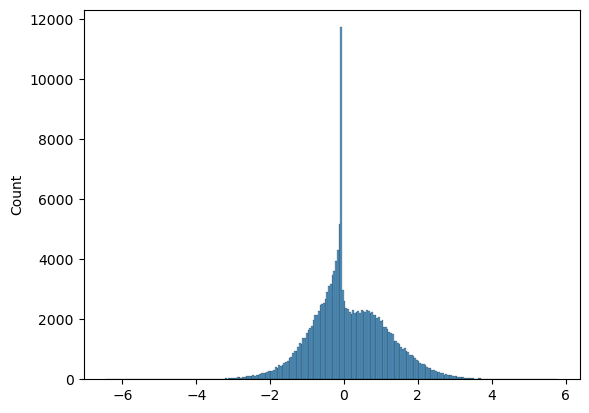

In [128]:
percept2 = Perceptron(random_state=1729)
percept2.fit(X_train,y_train)
y_scores = percept2.decision_function(X_train)
sns.histplot(np.sort(y_scores))
plt.show()

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores,pos_label=1)

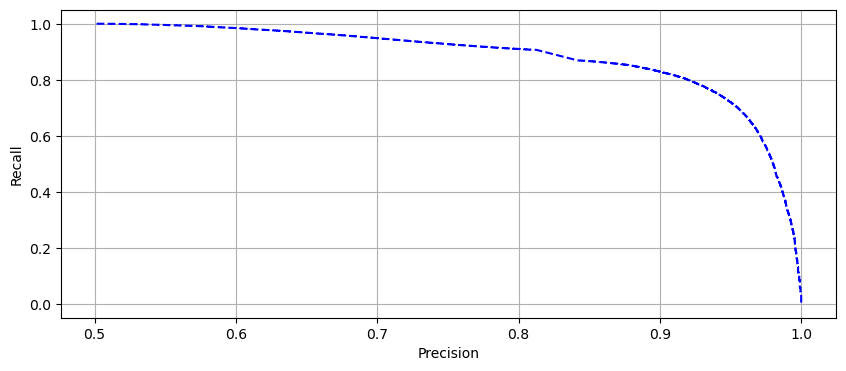

In [130]:
plt.figure(figsize=(10,4))
plt.plot(precisions[:-1], recalls[:-1], "b--")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

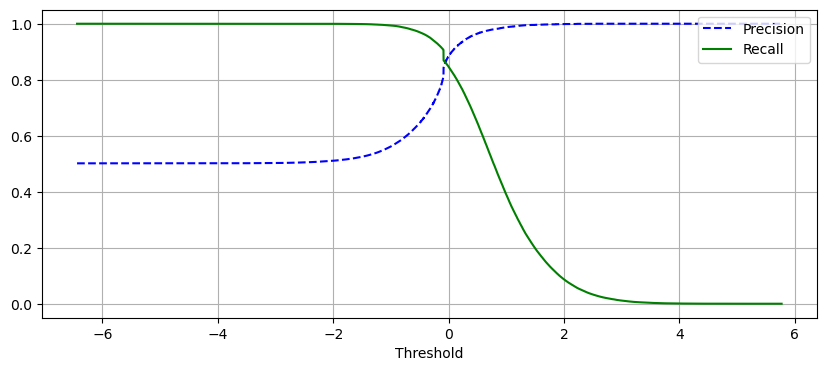

In [131]:
plt.figure(figsize=(10,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel('Threshold')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [132]:
idx_th = np.where(np.logical_and(thresholds>0,thresholds<1))
print('precision for zero thereshold:',precisions[idx_th[0][0]])

precision for zero thereshold: 0.884596547079711


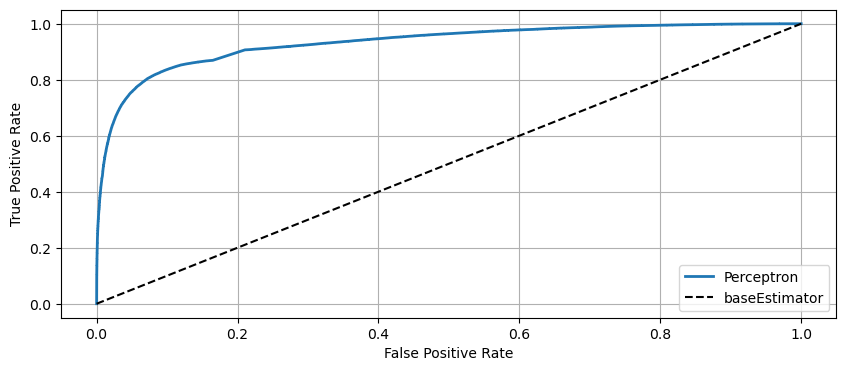

In [133]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.figure(figsize=(10,4))
plt.plot(fpr, tpr, linewidth=2,label='Perceptron')
plt.plot([0, 1], [0, 1], 'k--',label='baseEstimator')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend()
plt.show()

Perceptron with scaling

In [134]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
estimators = [('max_abs',MaxAbsScaler()),('percept',Perceptron())]
pipe = Pipeline(estimators)
pipe.fit(X_train,y_train)

Pipeline(steps=[('max_abs', MaxAbsScaler()), ('percept', Perceptron())])

# Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.78     21526
         1.0       0.79      0.75      0.77     21050

    accuracy                           0.78     42576
   macro avg       0.78      0.78      0.78     42576
weighted avg       0.78      0.78      0.78     42576

# Confusion matrix


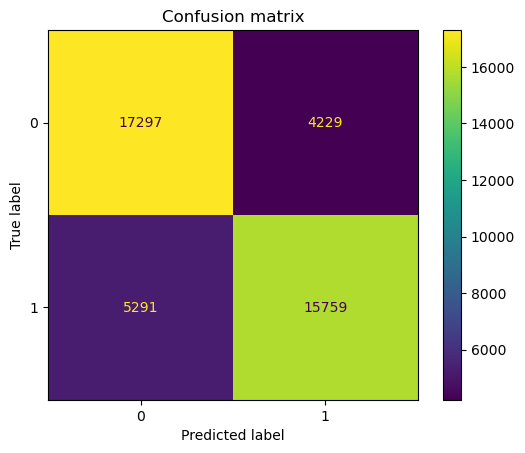

In [135]:
eval(pipe, X_test, y_test)

# HYPER PARAMETER TUNING

In [136]:
from sklearn.metrics import hinge_loss
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
scoring = make_scorer(hinge_loss,greater_is_better=False)
lr_grid = [1/2**n for n in range(1,6)]
percept_gscv = GridSearchCV(Perceptron(),param_grid={"eta0":lr_grid},scoring=scoring,cv=5)
percept_gscv.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=Perceptron(),
             param_grid={'eta0': [0.5, 0.25, 0.125, 0.0625, 0.03125]},
             scoring=make_scorer(hinge_loss, greater_is_better=False))

In [137]:
print("Best Hyperparameters:", percept_gscv.best_params_)

Best Hyperparameters: {'eta0': 0.5}


In [138]:
pprint(percept_gscv.cv_results_)

{'mean_fit_time': array([0.5429533 , 0.44325366, 0.43565664, 0.39280977, 0.3904222 ]),
 'mean_score_time': array([0.01210794, 0.01216011, 0.01264343, 0.01262541, 0.01254177]),
 'mean_test_score': array([-0.73037894, -0.73757205, -0.73188219, -0.73063144, -0.73063144]),
 'param_eta0': masked_array(data=[0.5, 0.25, 0.125, 0.0625, 0.03125],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'eta0': 0.5},
            {'eta0': 0.25},
            {'eta0': 0.125},
            {'eta0': 0.0625},
            {'eta0': 0.03125}],
 'rank_test_score': array([1, 5, 4, 2, 2], dtype=int32),
 'split0_test_score': array([-0.73612049, -0.74689528, -0.73626729, -0.73289099, -0.73289099]),
 'split1_test_score': array([-0.73104137, -0.7332433 , -0.72716597, -0.73353689, -0.73353689]),
 'split2_test_score': array([-0.73076923, -0.73276571, -0.73012331, -0.7244862 , -0.7244862 ]),
 'split3_test_score': array([-0.72545508, -0.7374633 , -0.731532

In [139]:
percept_clf = percept_gscv.best_estimator_

# Classification report
              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77     21526
         1.0       0.76      0.76      0.76     21050

    accuracy                           0.77     42576
   macro avg       0.77      0.77      0.77     42576
weighted avg       0.77      0.77      0.77     42576

# Confusion matrix


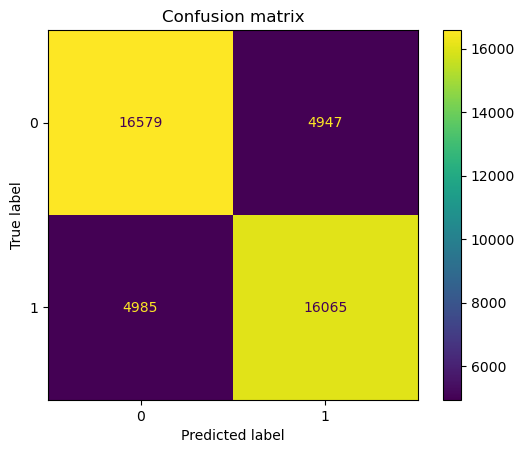

In [140]:
eval(percept_clf, X_test, y_test)

On an average, PERCEPTRON model has f1 score of 0.764 +/- 0.005 on the training set.
Dimention of Weights w: (1, 64288)
Bias :[-0.0025]
The loss function: <sklearn.linear_model._sgd_fast.Hinge object at 0x7be439121b30>
Training Accuracy:  0.8421451304153798
Testing Accuracy:  0.7729472003006389
# Classification report
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     21526
         1.0       0.78      0.75      0.77     21050

    accuracy                           0.77     42576
   macro avg       0.77      0.77      0.77     42576
weighted avg       0.77      0.77      0.77     42576

# Confusion matrix


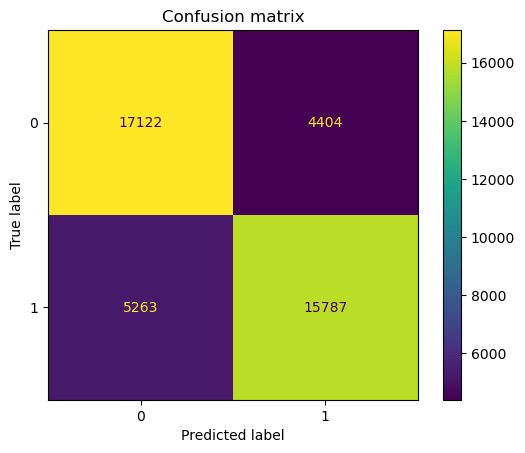

In [141]:
percept = Perceptron(max_iter=100, random_state=1729, warm_start=True, eta0 = 0.0625)
train_classifiers(percept, X_train, y_train, 5, 'PERCEPTRON')
eval(percept, X_test, y_test)

# NAIVE BAYES

In [142]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()


On an average, NaiveBayes model has f1 score of 0.790 +/- 0.001 on the training set.
Training Accuracy:  0.8318222921633334
Testing Accuracy:  0.7952837279218339
# Classification report
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     21526
         1.0       0.82      0.75      0.78     21050

    accuracy                           0.80     42576
   macro avg       0.80      0.79      0.79     42576
weighted avg       0.80      0.80      0.79     42576

# Confusion matrix


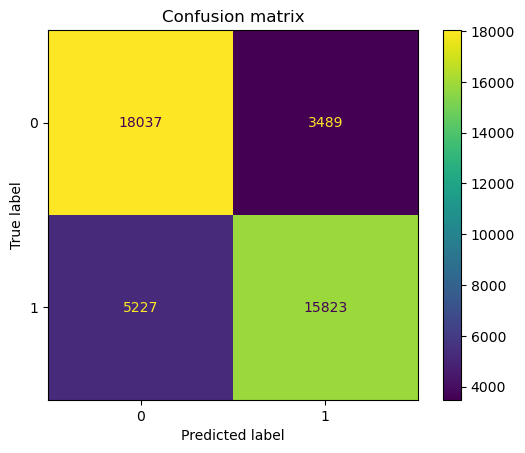

In [143]:
train_classifiers(BNB, X_train, y_train, 5, 'NaiveBayes')
eval(BNB, X_test, y_test)

# SVM

In [97]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.svm import LinearSVC
lsv = Pipeline([('scaler', MaxAbsScaler()),
                         ("classifier", LinearSVC(C=1))])


On an average, SVM model has f1 score of 0.812 +/- 0.002 on the training set.
Training Accuracy:  0.9154854317623986
Testing Accuracy:  0.8227639984968057
# Classification report
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83     21526
         1.0       0.85      0.78      0.81     21050

    accuracy                           0.82     42576
   macro avg       0.83      0.82      0.82     42576
weighted avg       0.82      0.82      0.82     42576

# Confusion matrix


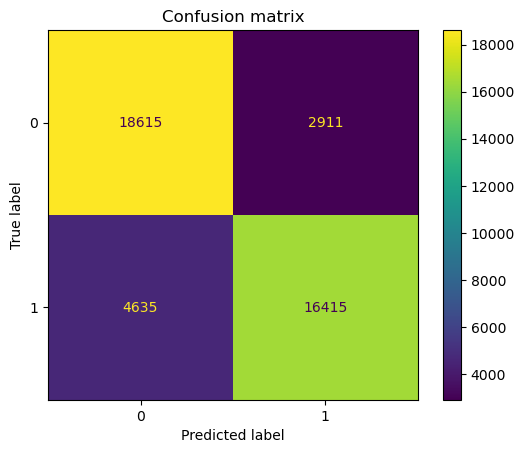

In [98]:
train_classifiers(lsv, X_train, y_train, 5, 'SVM')
eval(lsv, X_test, y_test)

In [99]:
# from sklearn.svm import LinearSVC
# acc = []
# acc_tr = []
# coefficient = []
# C = [0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
# for c in C:
#     SVM = LinearSVC(dual=False, C=c)
#     SVM.fit(X_train, y_train.ravel())
   
#     p_tr = SVM.predict(X_train)
#     a_tr = accuracy_score(y_train.ravel(), p_tr)
    
#     pred = SVM.predict(X_test)
#     a = accuracy_score(y_test.ravel(), pred)
    
#     acc_tr.append(a_tr)
#     acc.append(a)

# plt.subplots(figsize=(10, 5))
# plt.semilogx(C, acc,'-gD' ,color='red' , label="Testing Accuracy")
# plt.semilogx(C, acc_tr,'-gD' , label="Training Accuracy")
# plt.grid(True)
# plt.xlabel("Hyper Parameter C")
# plt.ylabel("Accuracy")
# plt.legend()
# plt.title('Accuracy versus the Hyper Parameter C (log-scale)')
# plt.show()

# Decision TREE CLASSIFIER

In [150]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
dt_pipeline = Pipeline(steps=[("feature_scaling", MaxAbsScaler()),
                              ("dt_classifier",
                               DecisionTreeClassifier(max_depth =10,
                                                      random_state = 42))])

In [151]:
dt_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_scaling', MaxAbsScaler()),
                ('dt_classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

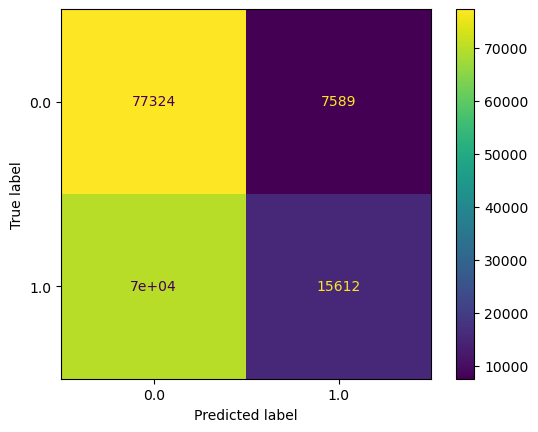

In [152]:
ConfusionMatrixDisplay.from_estimator(dt_pipeline, X_train, y_train)

In [153]:
print(classification_report(y_test, dt_pipeline.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.53      0.91      0.67     21526
         1.0       0.67      0.19      0.30     21050

    accuracy                           0.55     42576
   macro avg       0.60      0.55      0.48     42576
weighted avg       0.60      0.55      0.49     42576



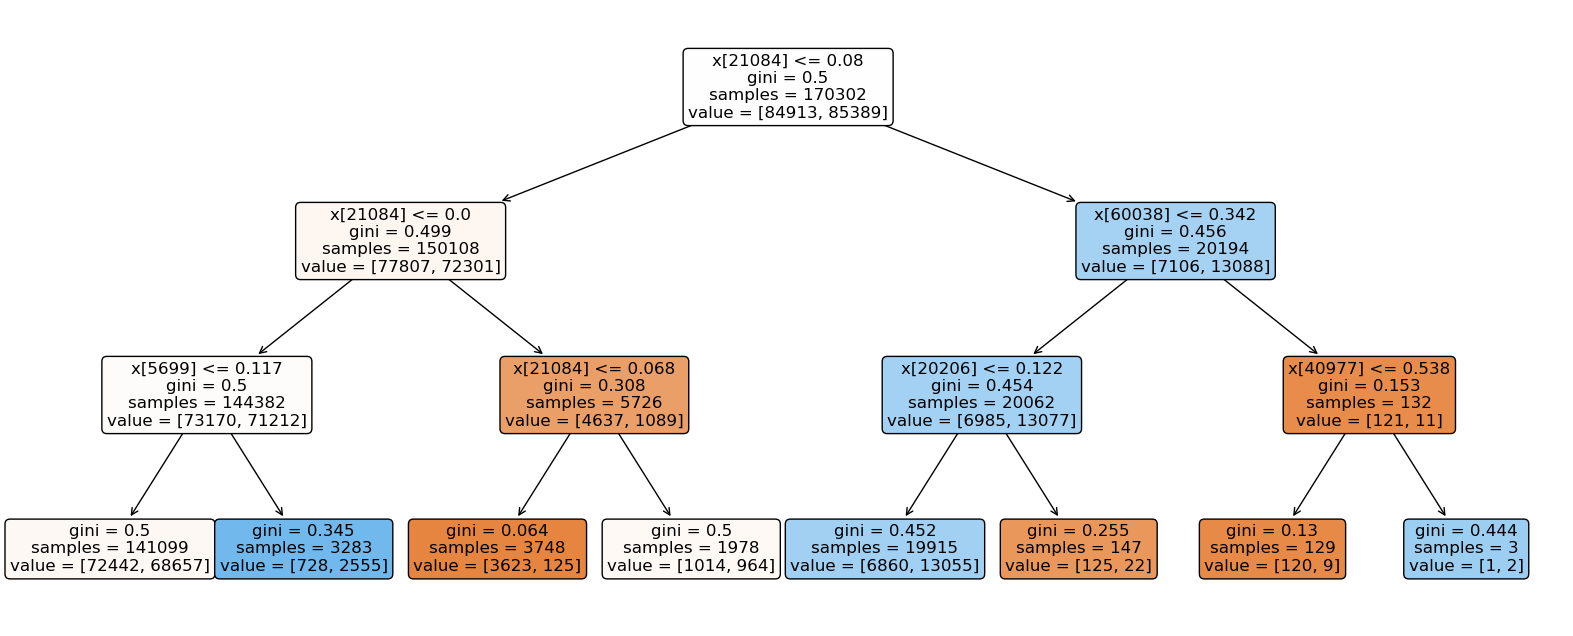

In [154]:
plt.figure(figsize=(20,8), facecolor ='w')
#create the tree plot
a = tree.plot_tree(dt_pipeline[-1],
                   #use the feature names stored
                   rounded = True,
                   filled = True,
                   fontsize=12)
#show the plot
plt.show()

In [155]:
tree_rules = export_text(dt_pipeline[-1],)
#print the result
print(tree_rules)

|--- feature_21084 <= 0.08
|   |--- feature_21084 <= 0.00
|   |   |--- feature_5699 <= 0.12
|   |   |   |--- class: 0.0
|   |   |--- feature_5699 >  0.12
|   |   |   |--- class: 1.0
|   |--- feature_21084 >  0.00
|   |   |--- feature_21084 <= 0.07
|   |   |   |--- class: 0.0
|   |   |--- feature_21084 >  0.07
|   |   |   |--- class: 0.0
|--- feature_21084 >  0.08
|   |--- feature_60038 <= 0.34
|   |   |--- feature_20206 <= 0.12
|   |   |   |--- class: 1.0
|   |   |--- feature_20206 >  0.12
|   |   |   |--- class: 0.0
|   |--- feature_60038 >  0.34
|   |   |--- feature_40977 <= 0.54
|   |   |   |--- class: 0.0
|   |   |--- feature_40977 >  0.54
|   |   |   |--- class: 1.0



In [156]:
# extract importance
importance = pd.DataFrame({'importance' : np.round(dt_pipeline[-1].feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

       importance
21084       0.782
5699        0.169
60038       0.026
20206       0.023
40977       0.001
...           ...
21436       0.000
21437       0.000
21438       0.000
21439       0.000
64287       0.000

[64288 rows x 1 columns]


In [ ]:
hp_grid = [{'dt_classifier__max_depth': [1,2,3,4,5,6,7,8,9,10],
            'dt_classifier__min_samples_split': [2,4,6,8,10]}]
gs_clf = GridSearchCV(dt_pipeline, hp_grid, scoring = 'f1_macro')
gs_clf.fit(X_train, y_train)

print("Best parameters:")
print()
print(gs_clf.best_params_)
print()
print("Grid scores:")
means = gs_clf.cv_results_["mean_test_score"]
stds = gs_clf.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                             gs_clf.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")

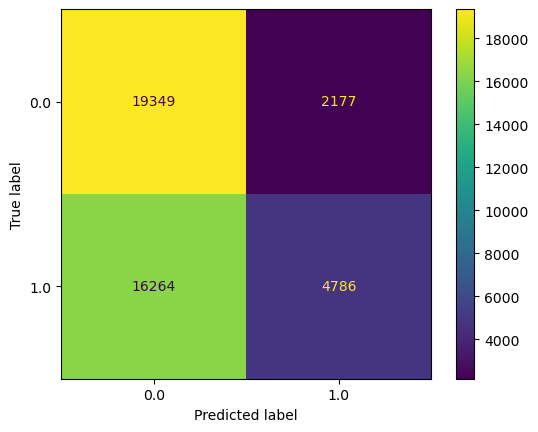

In [158]:
ConfusionMatrixDisplay.from_estimator(gs_clf.best_estimator_, X_test, y_test)

In [109]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Bagging

In [110]:
# bagging_pipeline = Pipeline([("classifier", BaggingClassifier())])
# train_classifiers(bagging_pipeline, X_train, y_train.ravel(), cv,
#                   "bagging")

In [111]:
# eval(bagging_pipeline, X_test, y_test)

# Random Forest

In [112]:
# random_forest_pipeline = Pipeline([("classifier", RandomForestClassifier())])

In [113]:
# train_classifiers(random_forest_pipeline, X_train, y_train.ravel(), cv,
#                   "random forest")

In [114]:
# eval(random_forest_pipeline, X_test, y_test)

# Training Best model with all train data

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
lsv = Pipeline([('scaler', MaxAbsScaler()),
                         ("classifier", LinearSVC(C=1))])
lsv.fit(X,y)

Pipeline(steps=[('scaler', MaxAbsScaler()), ('classifier', LinearSVC(C=1))])

On an average, SVM model has f1 score of 0.803 +/- 0.039 on the training set.
Training Accuracy:  0.9089149653792313
Testing Accuracy:  0.9099257797820368
# Classification report
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91     21526
         1.0       0.92      0.89      0.91     21050

    accuracy                           0.91     42576
   macro avg       0.91      0.91      0.91     42576
weighted avg       0.91      0.91      0.91     42576

# Confusion matrix


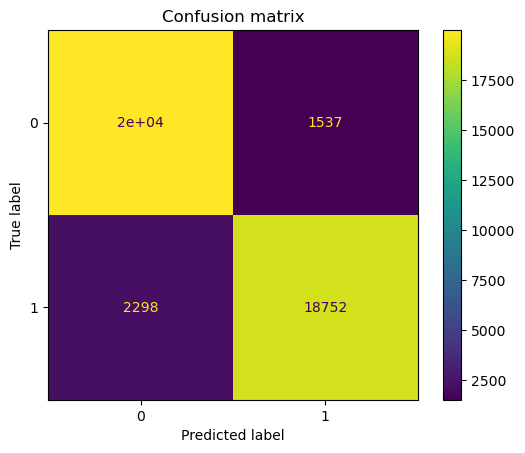

In [116]:
train_classifiers(lsv, X, y, 5, 'SVM')
eval(lsv, X_test, y_test)

# APPLYING THE Best MODEL TO TEST DATA

In [117]:
test_predictions = lsv.predict(X1_test_vect)

In [118]:
def mapp(i):
    if i ==1:
        return 'POSITIVE'
    else:
        return 'NEGATIVE'
   
applyall = np.vectorize(mapp)
test_predictions = applyall(test_predictions)
print(test_predictions)

['POSITIVE' 'NEGATIVE' 'NEGATIVE' ... 'POSITIVE' 'NEGATIVE' 'NEGATIVE']


In [119]:
submission = pd.DataFrame(columns = ['id', "sentiment"])
submission['id'] = [i for i in range(len(test_predictions))]
submission["sentiment"] = test_predictions



In [120]:
submission.shape, submission.info

((54071, 2),
 <bound method DataFrame.info of           id sentiment
 0          0  POSITIVE
 1          1  NEGATIVE
 2          2  NEGATIVE
 3          3  NEGATIVE
 4          4  NEGATIVE
 ...      ...       ...
 54066  54066  POSITIVE
 54067  54067  NEGATIVE
 54068  54068  POSITIVE
 54069  54069  NEGATIVE
 54070  54070  NEGATIVE
 
 [54071 rows x 2 columns]>)

In [121]:
submission.to_csv("submission.csv", index = False)